<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/vehicles_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from cv2 import cvtColor
from tensorflow.keras import models, datasets, layers

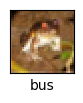

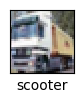

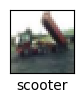

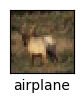

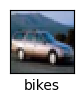

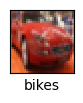

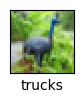

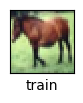

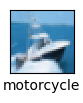

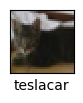

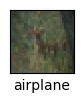

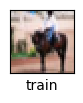

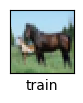

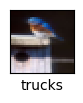

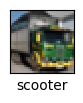

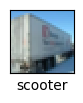

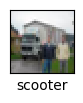

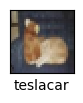

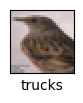

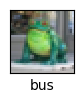

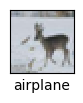

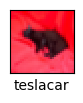

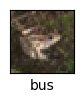

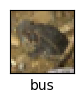

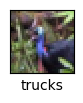

In [ ]:
(training_images, training_labels), (testing_images,testing_labels) = datasets.cifar10.load_data()
training_images,testing_images = training_images/255, testing_images/255
#Normalization: Divides each pixel value by 255 to scale the values to a range between 0 and 1

vehicles = ['cars','bikes','trucks','teslacar','airplane', 'boat', 'bus', 'train', 'motorcycle', 'scooter']

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i],cmap = plt.cm.binary)
  plt.xlabel(vehicles[training_labels[i][0]])
  plt.show()


In [ ]:
training_images =training_images[:7000]
training_labels =training_labels[:7000]
testing_images = testing_images[:2000]
testing_labels = testing_labels[:2000]

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2)) #This helps reduce the number of parameters and computation in the network.
model.add(layers.Conv2D(64,(3,3),activation='relu')) #convolutional layer with 64 filters, each of size 3x3
model.add(layers.Flatten()) # Flattens the 2D feature maps into a 1D vector,
model.add(layers.Dense(64,activation='relu')) #  Adds a fully connected layer with 64 units and ReLU activation.
model.add(layers.Dense(10,activation='softmax')) # output layer with 10 units .softmax function converts the output to a probability distribution across the 10 classes.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(training_images,training_labels,epochs=10,validation_data= (testing_images,testing_labels))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.2599 - loss: 1.9808 - val_accuracy: 0.4165 - val_loss: 1.6004
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.4892 - loss: 1.4311 - val_accuracy: 0.4840 - val_loss: 1.4301
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.5412 - loss: 1.2774 - val_accuracy: 0.5005 - val_loss: 1.3994
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6214 - loss: 1.0818 - val_accuracy: 0.5295 - val_loss: 1.4002
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.6784 - loss: 0.9361 - val_accuracy: 0.5320 - val_loss: 1.3579
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.7177 - loss: 0.7989 - val_accuracy: 0.5520 - val_loss: 1.3744
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.7777 - loss: 0.6516 - val_accuracy: 0.5410 - val_loss: 1.4296
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8243 - loss: 0.5192 - 

In [ ]:
loss, accuracy =model.evaluate(testing_images,testing_labels)
print(f"Loss is: {loss}")
print(f"Accuracy score: {accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5211 - loss: 1.7677
Loss is: 1.7772941589355469
Accuracy score: 0.5379999876022339


In [ ]:
model.save('Classifying_vehicles.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
prediction is: bikes


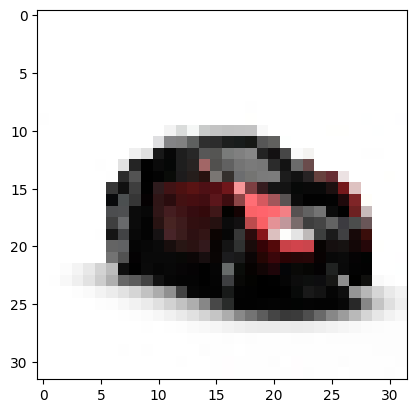

In [ ]:
from cv2 import COLOR_BGR2RGB
image= cv.imread('/car.webp')
image = cvtColor(image,cv.COLOR_BGR2RGB)
plt.imshow(image,cmap=plt.cm.binary)

prediction=model.predict(np.array([image])/255)
index = np.argmax(prediction)

print(f"prediction is: {vehicles[index]}")

plt.show()